# Wikipedia Notable Life Expectancies
# [Notebook  13: Models](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_models_thanak_2022_10_14.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [36]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)
from xgboost import XGBRegressor

# To randomly split data, for cross validation, and to check model performance
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for hyperparameter tuning searches
from scipy.stats import loguniform
from scipy.stats import uniform
from scipy.stats import expon

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
data = pd.read_csv("wp_life_expect_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77622,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77623,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
38534,43,66.0,0,0,0,0,0,0,1,0,0,0,1,4356.0,0.023256,17,289,Europe,No Prior Region,sports
55032,4,62.0,0,0,0,0,0,0,0,0,1,0,1,3844.0,0.250000,24,576,Asia,No Prior Region,politics_govt_law
47213,15,78.0,0,0,0,0,0,1,0,0,0,0,1,6084.0,0.066667,26,676,Asia,No Prior Region,arts
34842,4,68.0,0,0,0,0,0,0,1,0,0,0,1,4624.0,0.250000,26,676,North America,No Prior Region,sports
20255,6,40.0,0,0,0,0,0,1,0,0,0,0,1,1600.0,0.166667,6,36,Europe,No Prior Region,arts


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77624 non-null  int64  
 1   age                        77624 non-null  float64
 2   sciences                   77624 non-null  int64  
 3   social                     77624 non-null  int64  
 4   spiritual                  77624 non-null  int64  
 5   academia_humanities        77624 non-null  int64  
 6   business_farming           77624 non-null  int64  
 7   arts                       77624 non-null  int64  
 8   sports                     77624 non-null  int64  
 9   law_enf_military_operator  77624 non-null  int64  
 10  politics_govt_law          77624 non-null  int64  
 11  crime                      77624 non-null  int64  
 12  num_categories             77624 non-null  int64  
 13  age_sqrd                   77624 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   age                        77624 non-null  float64 
 2   sciences                   77624 non-null  int64   
 3   social                     77624 non-null  int64   
 4   spiritual                  77624 non-null  int64   
 5   academia_humanities        77624 non-null  int64   
 6   business_farming           77624 non-null  int64   
 7   arts                       77624 non-null  int64   
 8   sports                     77624 non-null  int64   
 9   law_enf_military_operator  77624 non-null  int64   
 10  politics_govt_law          77624 non-null  int64   
 11  crime                      77624 non-null  int64   
 12  num_categories             77624 non-null  int64   
 13  age_sqrd                   7762

<IPython.core.display.Javascript object>

## Data Preparation for Modeling
In contrast to building the [linear regression model](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), we will be tuning these models.  So, we will split the train set into train and validation sets and utilize the `test` set only to check out-of-sample performance of the champion model.  We will load and treat the test set at that point.

### Defining Independent and Dependent Variables for Train and Validation Sets

In [8]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X = df[predictor_cols]
y = df[target]

# One hot encoding of categorical predictors and typecasting all predictors as float
X = pd.get_dummies(X, drop_first=True).astype("float64")

# Splitting into 70:30 train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking shape of train and validation sets
print(
    f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the train set.\n"
)
print(
    f"There are {X_val.shape[0]} rows and {X_val.shape[1]} columns in the validation set.\n"
)

# Checking a sample
X_train.sample()

There are 54336 rows and 34 columns in the train set.

There are 23288 rows and 34 columns in the validation set.



,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
13319,5.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

## Model Building
#### Model Evaluation Criterion
The predictions made by the regressors will have the following performance metrics:
- RMSE
- MAE
- R$^2$
- Ajusted R$^2$
- MAPE

#### Which Metric to Optimize?
- For hyperparameter tuning, we will optimize R$^2$, which is the proportion of variation in the target that is explained by the predictors.  

- To select the champion model, will compare Adjusted R$^2$.  It is the metric that represents the amount of variation in the target that is explained by the predictors, with a penalty for more predictors.  The number of included predictors may vary between algorithms, especially as we are building including examples of decion tree regressors.  R$^2$ will improve with the addition of predictors, even if they contribute very little to the model, whereas, the penalty in Adjusted R$^2$ offsets such an increase.

#### Functions for Checking and Tuning Model Performance

In [16]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# Function to compute and display different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # Predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)  # To compute MAE
    mape = mape_score(target, pred)  # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Defining Scorer for Cross-validation and Hyperparameter Tuning

In [21]:
# Type of scoring used to compare parameter combinations--maximizing Adj R-squared
scorer = metrics.make_scorer(metrics.r2_score)

<IPython.core.display.Javascript object>

### Building the Models

In [39]:
%%time

# Creating list to store the models
models = []

# Appending models to the list
models.append(('Dtree', DecisionTreeRegressor(random_state=42)))

models.append(('Random Forest', RandomForestRegressor(random_state=42)))

models.append(('Bagging Dtree', BaggingRegressor(random_state=42)))

models.append(('GBM', GradientBoostingRegressor(random_state=42)))

models.append(('AdaBoost Dtree', AdaBoostRegressor(random_state=42)))

models.append(('XGB_gbtree', XGBRegressor(random_state=42)))

models.append(('XGB_gblinear', XGBRegressor(random_state=42, booster='gblinear')))

# Create empty list to store all model's names and CV scores
names = []
results = []

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation:" "\n")

for name, model in models:
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring='r2', cv=5
    )
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = r2_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation:

Dtree: -0.3729288388785845
Random Forest: -0.06498999161620542
Bagging Dtree: -0.09780574269930184
GBM: 0.10092407348408765
AdaBoost Dtree: -0.041942386214516916
XGB_gbtree: 0.08816799208071073
XGB_gblinear: 0.08272467293501293

Validation Performance:

Dtree: -0.3725798827812159
Random Forest: -0.06593088660036917
Bagging Dtree: -0.09925861808350978
GBM: 0.10355465508610728
AdaBoost Dtree: -0.05608653156428711
XGB_gbtree: 0.09146574210948322
XGB_gblinear: 0.08717872189219222
CPU times: total: 3min 37s
Wall time: 1min 8s


<IPython.core.display.Javascript object>

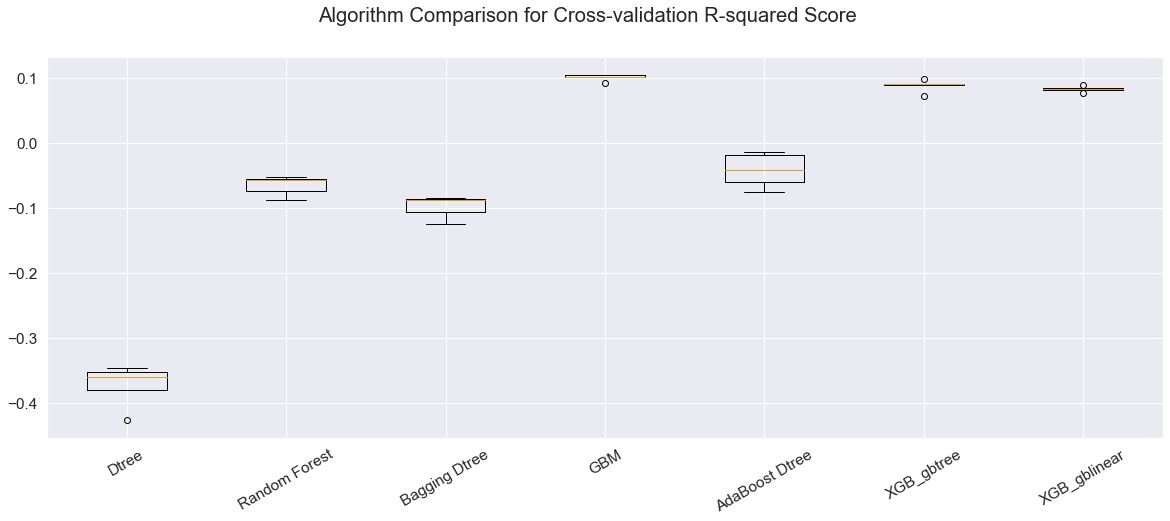

<IPython.core.display.Javascript object>

In [48]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison for Cross-validation R-squared Score")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=30)

plt.show()

#### Observations:
- We have negative R$^2$ values for four of the models.  This means they are performing worse than a model that merely equates the predicted values to the constant mean value of the target.
- The remaining three models, *GBM*, *XGB_gbtree*, and *XGB_gblinear* are giving generalized performances on train and validation sets, with similar, albeit very low, R$^2$ scores as [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb) (0.087).  Before hyperparameter tuning, GBM is outperforming the other models, including *olsmodel3*, with both train and validation R$^2$ scores of ~0.10.
- We will perform hyperparameter tuning on the top 3 models.  Purely as an exercise we will also keep Random Forest in the mix.

#### Collecting Models with Best Performance

In [76]:
# List of top models so far
top_models = [models[1]] + [models[3]] + models[-2:]

<IPython.core.display.Javascript object>

#### Creating Dataframes to Compare Training and Validation Performance of Best Models

In [78]:
# Creating empty dictionary to hold the models
models_to_tune = {}

# For loop to add models to dictionary
for model in top_models:
    key = model[0]
    value = model[1]
    models_to_tune[key] = value

# Initializing dataframes to compare performance of all models
models_train_comp_df = pd.DataFrame()
models_val_comp_df = pd.DataFrame()

# For loop to add performance results of each top model
for name, model in models_to_tune.items():
    models_train_comp_df[name] = model_performance_regression(model, X_train, y_train).T
    models_val_comp_df[name] = model_performance_regression(model, X_val, y_val).T

<IPython.core.display.Javascript object>

#### Comparing Top Models Before Hyperparameter Tuning

In [81]:
# Comparing train performance
print(f"Training Performance:")
models_train_comp_df

Training Performance:


,Random Forest,GBM,XGB_gbtree,XGB_gblinear
RMSE,11.686697,14.971421,14.237993,15.175418
MAE,8.736482,11.627512,11.034927,11.785195
R-squared,0.456950,0.108786,0.193965,0.084333
Adj. R-squared,0.456610,0.108228,0.193461,0.083760
MAPE,13.944396,19.221156,18.032207,19.425817


<IPython.core.display.Javascript object>

In [80]:
# Comparing validation performance
print(f"Validation Performance:")
models_val_comp_df

Validation Performance:


,Random Forest,GBM,XGB_gbtree,XGB_gblinear
RMSE,16.271584,14.922006,15.022284,15.057684
MAE,12.558769,11.580272,11.632590,11.697206
R-squared,-0.065931,0.103555,0.091466,0.087179
Adj. R-squared,-0.067489,0.102244,0.090137,0.085844
MAPE,20.193462,19.051063,19.008358,19.181966


<IPython.core.display.Javascript object>

#### Observations:
- Here, we compare the performance on the whole train set to the validation set.
- Only *GBM* and *XGB_gblinear* are giving generalized performances on the two sets.
- These two are performing on par or slightly better than [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), our linear regression model, for all metrics.
- We will see if hyperparameter tuning improves their performance, again keeping *Rand Forest* and *XGB_tree* in the mix for demonstration and comparison.

## Hyperparameter Tuning

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()